[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


/Users/lianama/CIR/contrastive-inverse-regression/testing/cir.py:384: LinAlgWarning: Ill-conditioned matrix (rcond=3.64898e-19): result may not be accurate.
  aa = solve(eye2k + (alpha * tau) * VU, VX)
/Users/lianama/CIR/contrastive-inverse-regression/testing/cir.py:384: LinAlgWarning: Ill-conditioned matrix (rcond=3.64894e-19): result may not be accurate.
  aa = solve(eye2k + (alpha * tau) * VU, VX)
/Users/lianama/CIR/contrastive-inverse-regression/testing/cir.py:384: LinAlgWarning: Ill-conditioned matrix (rcond=3.64804e-19): result may not be accurate.
  aa = solve(eye2k + (alpha * tau) * VU, VX)
/Users/lianama/CIR/contrastive-inverse-regression/testing/cir.py:384: LinAlgWarning: Ill-conditioned matrix (rcond=3.6296e-19): result may not be accurate.
  aa = solve(eye2k + (alpha * tau) * VU, VX)
/Users/lianama/CIR/contrastive-inverse-regression/testing/cir.py:384: LinAlgWarning: Ill-conditioned matrix (rcond=3.55851e-19): result may not be accurate.
  aa = solve(eye2k + (alpha * tau) *

/Users/lianama/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/lianama/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


---------------------------------------------------

Results for Scaled Gradient Projection Method 

---------------------------------------------------

   Obj. function = 3.891533e+05

   Gradient norm = 1.229389e+01 

   ||X^T*X-I||_F = 4.97e-16

   Iteration number = 3000

   Cpu time (secs) = 9.7987

   Number of evaluation(Obj. func) = 4123

[ 1  2  3  4  5  6  7  8  9 10]


/var/folders/dr/k6wp_5ns5hj632l6j_ks1nc80000gn/T/ipykernel_6115/4070039101.py:82: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_curr[:, 0], X_curr[:, 1], s=100, c=colors[l], marker=markers[l])


(array([-40., -30., -20., -10.,   0.,  10.,  20.,  30.]),
 [Text(0, -40.0, '−40'),
  Text(0, -30.0, '−30'),
  Text(0, -20.0, '−20'),
  Text(0, -10.0, '−10'),
  Text(0, 0.0, '0'),
  Text(0, 10.0, '10'),
  Text(0, 20.0, '20'),
  Text(0, 30.0, '30')])

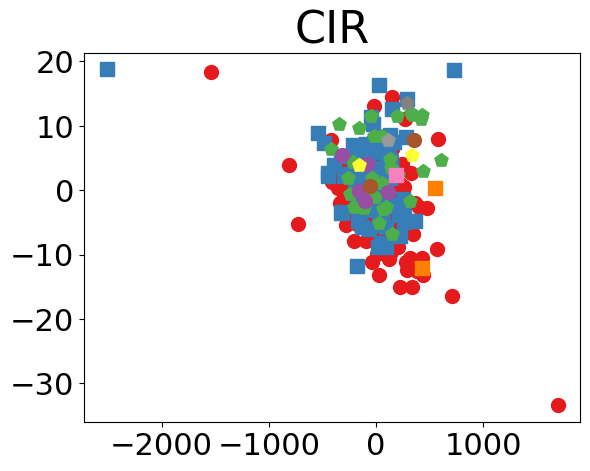

In [2]:
import numpy as np
import pandas as pd
import time
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels
import statsmodels.api as sm

import cir
from cir import CIR
from importlib import reload
reload(cir)


data = pd.read_table('Retinol.txt', header=None, delim_whitespace=True)
data = data.iloc[:, :]

# foreground data 
fg = data.iloc[:, :12].dropna()

# foreground response (continuous)
Y = data.iloc[:, 12]
n, p = fg.shape  # foreground sample size
X = fg - np.mean(fg, axis=0)
X = X.values

# foreground slices 
L = 10
partition = np.linspace(min(Y), max(Y), L)
labels = np.zeros(n)
for i in range(n):
    labels[i] = max(np.where(Y.iloc[i] >= partition)[0]) + 1

# background data 
bg = data.iloc[:, :12].dropna()
m, p = bg.shape     # background sample size

# background data
Yt = data.iloc[:, 13]
Lt = 10
partitiont = np.linspace(min(Yt), max(Yt), Lt)
labelst = np.zeros(m)
for i in range(m):
    labelst[i] = max(np.where(Yt.iloc[i] >= partitiont)[0]) + 1

d = 2
alpha = 0.1


V_CIR = CIR(fg,labels,bg,labelst,alpha,d)
X_CIR = X @ V_CIR


# tuning parameter
alpha = 0.1
d = 2

# # colors = 228/255
# markers = 'o'
colors = [[228/255, 26/255, 28/255],
          [55/255, 126/255, 184/255],
          [77/255, 175/255, 74/255],
          [152/255, 78/255, 163/255],
          [255/255, 127/255, 0/255],
          [255/255, 255/255, 51/255],
          [166/255, 86/255, 40/255],
          [247/255, 129/255, 191/255],
          [153/255, 153/255, 153/255],
          [130/255, 130/255, 130/255]]


markers = ['o', 's', 'p', 'o', 's', 'p', 'o', 's', 'p', 'p']
g = np.arange(1, 11, 1)
print(g)

for l in range(L):
    idx = np.where(labels == g[l])[0]
    X_curr = X_CIR[idx, :]
    plt.scatter(X_curr[:, 0], X_curr[:, 1], s=100, c=colors[l], marker=markers[l])
# # plt.hold(False)
plt.title('CIR', fontsize=32)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
# plt.show()